In [2]:
import logging
import time
from datetime import datetime
import backtrader as bt
import tushare as ts
import os
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

ts.set_token('adb0ef8900a40075aaeab987278f80e49701afcd29eec9f5693428db')
pro = ts.pro_api()

In [3]:
stocks1={'002459.SZ':'2010-08-10','002709.SZ':'2014-01-23','002812.SZ':'2016-09-14','002821.SZ':'2016-11-18','300450.SZ':'2015-05-18','300750.SZ':'2018-06-11','300775.SZ':'2019-05-21','300782.SZ':'2019-06-18','300896.SZ':'2020-09-28'}
stocks2={'000002.SZ':'1991-01-29','000063.SZ':'1997-11-18','000333.SZ':'2013-09-18','000338.SZ':'2007-04-30','000568.SZ':'1994-05-09','600030.SH':'2003-01-06','600036.SH':'2002-04-09','600096.SH':'1997-07-09','600885.SH':'1996-02-05','600887.SH':'1996-03-12'}

In [7]:
#获取序列数据保存到文件夹
def get_single_kdata(code, start, end='2023-02-08'):
    df = ts.pro_bar(ts_code=code, start_date=start, end_date=end,asset='E',adj='qfq',freq='D')
    #df['trade_date']=df['trade_date']+' 00:00:00'
    df['trade_date'] =df['trade_date'].apply(lambda x:x+' 00:01:00')
    '''df['trade_date'] =df['trade_date'].apply(lambda x:datetime.strptime(x+' 00:00:00',"%Y%m%d %H:%M:%S"))'''
    df['date']=pd.to_datetime(df['trade_date'],format="%Y%m%d %H:%M:%S")
    df['volume']=df['vol']
    df['openinterest'] = 0
    df.set_index('date',drop=True,inplace=True)
    return df[[ 'open', 'high', 'low', 'close', 'volume', 'openinterest']]


for stk in stocks1.keys():
    bt_start = datetime.strptime(stocks1[stk],"%Y-%m-%d") + relativedelta(months=+6)
    bt_start=bt_start.strftime("%Y%m%d")
    #print(get_single_kdata(stk,start=bt_start))
    get_single_kdata(stk,start=bt_start).to_csv('data/stocks1/'+stk+'.csv')
    #print(get_single_kdata('002459.SZ',start=bt_start))
for stk in stocks2.keys():
    bt_start = datetime.strptime(stocks2[stk],"%Y-%m-%d") + relativedelta(months=+6)
    bt_start=bt_start.strftime("%Y%m%d")
    get_single_kdata(stk,start='2010-01-01').to_csv('data/stocks2/'+stk+'.csv')
    #print(get_single_kdata('002459.SZ',start=bt_start))

In [13]:
#单独测试，可以忽略
def get_single_kdata(code, start, end='2023-02-08'):
    df = ts.pro_bar(ts_code=code, start_date=start, end_date=end,asset='E',adj='qfq',freq='D')
    df['trade_date'] =df['trade_date'].apply(lambda x:x+' 00:01:00')
    '''df['trade_date'] =df['trade_date'].apply(lambda x:datetime.strptime(x+' 00:00:00',"%Y%m%d %H:%M:%S"))'''
    df['date']=pd.to_datetime(df['trade_date'],format="%Y%m%d %H:%M:%S")
    df['volume']=df['vol']
    df['openinterest'] = 0
    print(df.info())
    print(df)
    df.set_index('date',drop=True,inplace=True)

    return df[[ 'open', 'high', 'low', 'close', 'volume', 'openinterest']]

stk='000002.SZ'
'''bt_start = datetime.strptime(stocks1[stk],"%Y-%m-%d") + relativedelta(months=+6)
bt_start=bt_start.strftime("%Y%m%d")'''
stkdf=get_single_kdata(stk,start=bt_start)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ts_code       6000 non-null   object        
 1   trade_date    6000 non-null   object        
 2   open          5784 non-null   float64       
 3   high          5784 non-null   float64       
 4   low           5784 non-null   float64       
 5   close         5784 non-null   float64       
 6   pre_close     5784 non-null   float64       
 7   change        5784 non-null   float64       
 8   pct_chg       5784 non-null   float64       
 9   vol           6000 non-null   float64       
 10  amount        6000 non-null   float64       
 11  date          6000 non-null   datetime64[ns]
 12  volume        6000 non-null   float64       
 13  openinterest  6000 non-null   int64         
dtypes: datetime64[ns](1), float64(10), int64(1), object(2)
memory usage: 656.4+ KB
None
    

In [14]:
#初始化回测模型
cerebro = bt.Cerebro()
# 设定初始资金
startcash=1000000
cerebro.broker.setcash(startcash)
# 策略执行前的资金
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
# 策略执行后的资金
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00
Final Portfolio Value: 1000000.00


In [17]:
#数据注入与模型主体
data=bt.feeds.PandasData(dataname=stkdf)
cerebro.adddata(data)

cerebro.addstrategy(MAStrategy)

#运行回测系统
cerebro.run()
#获取回测结束后的总资金
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
#打印结果
print(f'总资金: {round(portvalue,2)}')


AttributeError: 'Lines_LineSeries_LineIterator_DataAccessor_Strateg' object has no attribute 'log'

AttributeError: 'Lines_LineSeries_LineIterator_DataAccessor_Strateg' object has no attribute 'log'

In [17]:
#akshare测试
import logging
import time
from datetime import datetime
import backtrader as bt
import tushare as ts
import os
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta

stkdf=ak.stock_zh_a_daily(symbol='sz002459',start_date='20100810',end_date='20230228',adjust='qfq')
stkdf=stkdf.set_index('date')
print(stkdf)


class MAStrategy(bt.Strategy):
    

#     def next(self):
#         today=self.datas[0].datetime.date()
#         weekday=today.weekday()+1
#         close=self.datas[0].close[0]
#         if weekday==1:
#             self.order=self.buy(size= int(self.broker.get_cash()/close/100)*100 )
#             #print("buy"+str(int(self.broker.get_cash()/close/100)*100  ))
#         elif weekday==4:
#             self.order=self.sell(size=self.getposition().size)
#             #print("sell"+str(self.getposition().size) )    
    
    
    def next(self):
        # 记录收盘价
        #self.log('Close, %.2f' % self.dataclose[0])
        s=5
        l=10
        self.sma_s = bt.indicators.SimpleMovingAverage(self.datas[0], period=s)
        self.sma_l = bt.indicators.SimpleMovingAverage(self.datas[0], period=l)
        # 是否正在下单，如果是的话不能提交第二次订单
        if self.order:
            return

        # 是否已经买入
        if not self.position:

            # 还没买，如果 MA5 > MA10 说明涨势，买入
            if self.sma_s[0] > self.sma_l[0]:
                #self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy()

        else:
            # 已经买了，如果 MA5 < MA10 ，说明跌势，卖出
            if self.sma_s[0] < self.sma_l[0]:
                #self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell()

                
                
                
#初始化回测模型
cerebro = bt.Cerebro()
# 设定初始资金
startcash=1000000
cerebro.broker.setcash(startcash)
# 策略执行前的资金
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
# 策略执行后的资金
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

#数据注入与模型主体
data=bt.feeds.PandasData(dataname=stkdf)
cerebro.adddata(data)

cerebro.addstrategy(MAStrategy)

#运行回测系统
cerebro.run()
#获取回测结束后的总资金
portvalue = cerebro.broker.getvalue()
pnl = portvalue - startcash
#打印结果
print(f'总资金: {round(portvalue,2)}')                

             open   high    low  close      volume  outstanding_share  \
date                                                                    
2010-08-10  16.64  19.99  16.64  19.59  30548100.0       3.440000e+07   
2010-08-11  18.04  19.56  17.76  18.30  20902678.0       3.440000e+07   
2010-08-12  17.98  18.13  16.53  16.75  13380560.0       3.440000e+07   
2010-08-13  16.64  16.88  16.10  16.53   7262866.0       3.440000e+07   
2010-08-16  16.43  17.10  16.21  16.91   6467613.0       3.440000e+07   
...           ...    ...    ...    ...         ...                ...   
2023-02-22  59.60  61.00  58.50  58.80  11629907.0       2.343687e+09   
2023-02-23  59.00  60.82  58.61  60.13  18632038.0       2.343687e+09   
2023-02-24  60.13  60.30  58.48  58.89  12851834.0       2.343687e+09   
2023-02-27  58.88  62.55  58.50  61.28  23982759.0       2.343687e+09   
2023-02-28  61.00  61.39  59.90  61.12  13799113.0       2.343687e+09   

            turnover  
date                  
2010

AttributeError: 'Lines_LineSeries_LineIterator_DataAccessor_Strateg' object has no attribute 'order'

2021-01-04    0.000000
2021-01-05    0.034200
2021-01-06   -0.020886
2021-01-07   -0.037685
2021-01-08   -0.011083
                ...   
2022-03-24   -0.037364
2022-03-25    0.002478
2022-03-28    0.000000
2022-03-29   -0.016670
2022-03-30    0.018648
Length: 300, dtype: float64


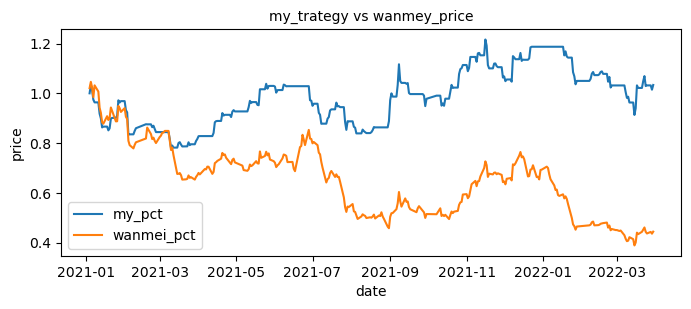

In [6]:

import backtrader as bt
import akshare as ak
import warnings
import warnings 
warnings.filterwarnings('ignore', category=UserWarning) 

wanmei = ak.stock_zh_a_daily(symbol="sz002624", start_date="20210101",
                           end_date="20220330", adjust="qfq")
wanmei=wanmei.set_index('date')
wanmei



import backtrader as bt
import pandas as pd
import math
class TestStrategy(bt.Strategy):
    def next(self):
        today=self.datas[0].datetime.date()
        weekday=today.weekday()+1
        close=self.datas[0].close[0]
        if weekday==1:
            self.order=self.buy(size= int(self.broker.get_cash()/close/100)*100 )
            #print("buy"+str(int(self.broker.get_cash()/close/100)*100  ))
        elif weekday==4:
            self.order=self.sell(size=self.getposition().size)
            #print("sell"+str(self.getposition().size) )
            
        #print(cerebro.broker.get_cash())
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)

wanmei_btdata = bt.feeds.PandasData(dataname=wanmei)
cerebro.adddata(wanmei_btdata)

cerebro.broker.setcash(100000.0)
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name = "TimeReturn")
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name = "TimeReturnBenchMark", data = wanmei_btdata)
results = cerebro.run()
strat = results[0] 
portvalue = cerebro.broker.getvalue()
returns=pd.Series(strat.analyzers.TimeReturn.get_analysis())
benchReturns=pd.Series(strat.analyzers.TimeReturnBenchMark.get_analysis())

print(returns)

my_pct=[]
bench_pct=[]

my_pct=returns+1
my_pct=my_pct.cumprod()
bench_pct=benchReturns+1
bench_pct=bench_pct.cumprod()

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
#font_set = FontProperties(fname=r"/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc", size=12) 
font_set=None
plt.figure(dpi=100,figsize=(8,3))
plt.title(u"my_trategy vs wanmey_price",fontproperties=font_set)
plt.xlabel(u"date",fontproperties=font_set)
plt.ylabel(u"price",fontproperties=font_set)
plt.plot(my_pct)
plt.plot(bench_pct)
plt.legend([u'my_pct','wanmei_pct'])

 
plt.show()